## **IMPORTANDO DADOS**

In [0]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [0]:
covid = pd.read_csv('https://raw.githubusercontent.com/MarceloAugustoMathias/covid-19/master/Predi%C3%A7%C3%A3o%20Prophet/covid_19_data.csv')

In [0]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7925,7926,03/22/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


## **RENOMEANDO COLUNAS**

In [0]:
covid.rename(columns={'ObservationDate':'Date', 'Province/State':'State', 'Country/Region':'Country'}, inplace=True)

In [0]:
covid.tail()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7925,7926,03/22/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


## **AGRUPANDO POR DATA E SOMANDO AS MORTES**

In [0]:
mortes = covid.groupby('Date').sum()['Deaths']

In [0]:
mortes = mortes.reset_index()

In [0]:
mortes.tail()

,Date,Deaths
56,03/18/2020,8733.0
57,03/19/2020,9867.0
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14634.0


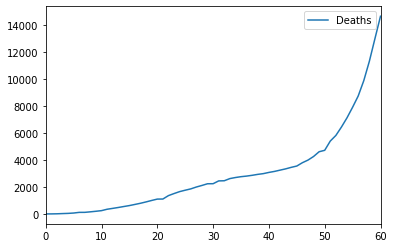

In [0]:
mortes.plot()

# ***USANDO O PROPHET***

PARA USAR O PROPHET PRECISAMOS TER UM DATAFRAME DO PANDAS COM APENAS 2 VARIAVEIS, SENDO ELAS **ds** e **y**.
A DATA DEVE TER O FORMATO *AAAA-MM-DD*

**RENOMEANDO COLUNAS**

In [0]:
mortes.columns = ['ds', 'y']  #esse metodo é melhor que o rename pois vamos renomear todas as colunas, e nao apenas algumas
mortes.tail()

,ds,y
56,03/18/2020,8733.0
57,03/19/2020,9867.0
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14634.0


In [0]:
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
56,2020-03-18,8733.0
57,2020-03-19,9867.0
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14634.0


**CONFIANÇA**

NAS SÉRIES TEMPORAIS A TENDÊNCIA MUDA O TEMPO TODO, POR ISSO VAMOS TRABALHAR COM INTERVALO DE CONFIANÇA DE **95**%

In [0]:
dias = 21

In [0]:
m = Prophet(interval_width=0.95)  ## Instanciando o profeta
m.fit(mortes)    ## Passando o DataFrame
futuro = m.make_future_dataframe(periods=dias) ## Criando as datas futuras

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
futuro.tail((dias+3))

,ds
58,2020-03-20
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29


In [0]:
previsao = m.predict(futuro) ## Gerando a previsao
previsao.tail((dias+3))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
58,2020-03-20,10623.962089,9590.269935,11669.006036,10623.962089,10623.962089,5.307263,5.307263,5.307263,5.307263,5.307263,5.307263,0.0,0.0,0.0,10629.269352
59,2020-03-21,11256.484911,10276.445243,12384.966286,11256.484911,11256.484911,102.593538,102.593538,102.593538,102.593538,102.593538,102.593538,0.0,0.0,0.0,11359.078448
60,2020-03-22,11889.007733,10991.298477,13126.343058,11889.007733,11889.007733,217.513904,217.513904,217.513904,217.513904,217.513904,217.513904,0.0,0.0,0.0,12106.521637
61,2020-03-23,12521.530554,11456.772142,13438.446822,12493.108480,12543.727993,-76.432264,-76.432264,-76.432264,-76.432264,-76.432264,-76.432264,0.0,0.0,0.0,12445.098290
62,2020-03-24,13154.053376,12009.728154,14021.831350,13068.793951,13224.631141,-106.273440,-106.273440,-106.273440,-106.273440,-106.273440,-106.273440,0.0,0.0,0.0,13047.779936
63,2020-03-25,13786.576198,12632.436317,14745.234866,13640.299574,13920.640079,-70.504043,-70.504043,-70.504043,-70.504043,-70.504043,-70.504043,0.0,0.0,0.0,13716.072155
64,2020-03-26,14419.099020,13286.776831,15424.655929,14189.829687,14636.385968,-72.204957,-72.204957,-72.204957,-72.204957,-72.204957,-72.204957,0.0,0.0,0.0,14346.894063
65,2020-03-27,15051.621841,13946.569993,16202.216845,14747.666860,15342.876251,5.307263,5.307263,5.307263,5.307263,5.307263,5.307263,0.0,0.0,0.0,15056.929104
66,2020-03-28,15684.144663,14695.389671,16883.592746,15285.600764,16061.702330,102.593538,102.593538,102.593538,102.593538,102.593538,102.593538,0.0,0.0,0.0,15786.738201
67,2020-03-29,16316.667485,15358.547299,17628.308708,15834.389187,16790.536611,217.513904,217.513904,217.513904,217.513904,217.513904,217.513904,0.0,0.0,0.0,16534.181389


In [0]:
previsao[['ds', 'yhat_lower','yhat', 'yhat_upper']].tail((dias+3))

,ds,yhat_lower,yhat,yhat_upper
58,2020-03-20,9590.269935,10629.269352,11669.006036
59,2020-03-21,10276.445243,11359.078448,12384.966286
60,2020-03-22,10991.298477,12106.521637,13126.343058
61,2020-03-23,11456.772142,12445.098290,13438.446822
62,2020-03-24,12009.728154,13047.779936,14021.831350
63,2020-03-25,12632.436317,13716.072155,14745.234866
64,2020-03-26,13286.776831,14346.894063,15424.655929
65,2020-03-27,13946.569993,15056.929104,16202.216845
66,2020-03-28,14695.389671,15786.738201,16883.592746
67,2020-03-29,15358.547299,16534.181389,17628.308708


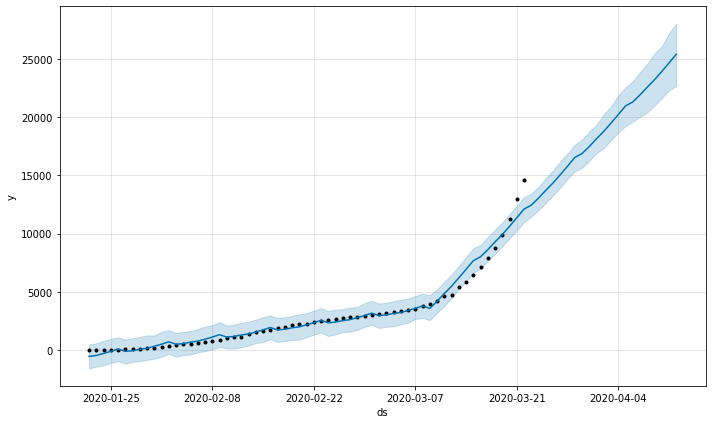

In [0]:
confirmed_forecast_plot = m.plot(previsao)